In [1]:
import numpy as np
import math
import numpy.random as npr
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Continuous observations

def PriceBarrierOptions(S, r, sigma, T, K, H,option_type):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    nd1 = norm.cdf(d1, 0.0, 1.0)
    nd2 = norm.cdf(d2, 0.0, 1.0)
    nd1minus = norm.cdf(-d1, 0.0, 1.0)
    nd2minus = norm.cdf(-d2, 0.0, 1.0)

    l = (r + (sigma * sigma *0.5)) / (sigma * sigma)
    y = np.log((H*H)/(S*K)) / (sigma * np.sqrt(T)) + l * sigma * np.sqrt(T)
    x1 = np.log(S/H)/(sigma * np.sqrt(T))+l*sigma * np.sqrt(T)
    y1 = np.log(H/S)/(sigma * np.sqrt(T))+l*sigma * np.sqrt(T)

    c = S * nd1 - K * np.exp(-r*T) * nd2
    p = K * np.exp(-r*T) * nd2minus  - S * nd1minus

        
    if H<=K and S<=H:
        cdo = pdo = 0
        cdi = S * (H/S)**(2*l) * norm.cdf(y) - K * np.exp(-r*T) * (H/S)**(2*l-2.0) * norm.cdf(y-sigma*np.sqrt(T))
        cui = c
        cuo = 0.
        puo = -S*norm.cdf(-x1) + K * np.exp(-r*T) * norm.cdf(-x1+sigma*np.sqrt(T)) +  S*(H/S)**(2*l)*norm.cdf(-y1) - K * np.exp(-r*T)*(H/S)**(2*l-2.0)*norm.cdf(-y1+sigma*np.sqrt(T))
        pui = p - puo
        #pdi = - S * norm.cdf(-x1) + K * np.exp(-r*T) * norm.cdf(-x1+sigma*np.sqrt(T)) + S*(H/S)**(2*l)*(norm.cdf(y)-norm.cdf(y1))-K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(y-sigma*np.sqrt(T))-norm.cdf(y1-sigma*np.sqrt(T))) 
        pdi = p
    
    elif H<=K and S>=H:
        cuo=puo = 0
        cdi = S * (H/S)**(2*l) * norm.cdf(y) - K * np.exp(-r*T) * (H/S)**(2*l-2.0) * norm.cdf(y-sigma*np.sqrt(T))
        cdo = c - cdi
        cui = c
        pui = p - puo
        pdi = - S * norm.cdf(-x1) + K * np.exp(-r*T) * norm.cdf(-x1+sigma*np.sqrt(T)) + S*(H/S)**(2*l)*(norm.cdf(y)-norm.cdf(y1))-K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(y-sigma*np.sqrt(T))-norm.cdf(y1-sigma*np.sqrt(T))) 
        pdo=p-pdi

        
    elif H>K and S<=H:
        #cdo = S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1-sigma*np.sqrt(T)) - S * (H/S)**(2*l)*norm.cdf(y1) + K * np.exp(-r*T)*(H/S)**(2*l-2.0)*norm.cdf(y1-sigma*np.sqrt(T))
        cdo = pdo = 0
        cdi = c - cdo
        cui =  S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1 - sigma*np.sqrt(T)) - S*(H/S)**(2*l)*(norm.cdf(-y)-norm.cdf(-y1)) + K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(-y+sigma*np.sqrt(T))-norm.cdf(-y1+sigma*np.sqrt(T)))
        cuo = c - cui
        pui = - S * (H/S)**(2*l) * norm.cdf(-y) + K * np.exp(-r*T) * (H/S)**(2*l-2.0)* norm.cdf(-y+sigma*np.sqrt(T))
        puo = p - pui
        pdi = p
        
    elif H>K and S>=H:
        pdo = 0
        cuo=puo = 0
        cdo = S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1-sigma*np.sqrt(T)) - S * (H/S)**(2*l)*norm.cdf(y1) + K * np.exp(-r*T)*(H/S)**(2*l-2.0)*norm.cdf(y1-sigma*np.sqrt(T))
        cdi = c - cdo
        cui =  c#S * norm.cdf(x1) - K * np.exp(-r*T) * norm.cdf(x1 - sigma*np.sqrt(T)) - S*(H/S)**(2*l)*(norm.cdf(-y)-norm.cdf(-y1)) + K*np.exp(-r*T)*(H/S)**(2*l-2.0)*(norm.cdf(-y+sigma*np.sqrt(T))-norm.cdf(-y1+sigma*np.sqrt(T)))
        pui = - S * (H/S)**(2*l) * norm.cdf(-y) + K * np.exp(-r*T) * (H/S)**(2*l-2.0)* norm.cdf(-y+sigma*np.sqrt(T))
        pdi = p
    

    result = {
        'c' : c,
        'p' : p,
        'cdi' : cdi,
        'cdo' : cdo,
        'cui' : cui,
        'cuo' : cuo,
        'pdi' : pdi,
        'pdo' : pdo,
        'pui' : pui,
        'puo' : puo,
    }
    return result[option_type] 
xxx = np.linspace(0.7,4.2)
vf = np.vectorize(PriceBarrierOptions)
r, sigma, T, K, H = 0.02 , 0.2, 0.1, 0.9, 1
print("(r, sigma, T, K, H)")
print((r, sigma, T, K, H))

(r, sigma, T, K, H)
(0.02, 0.2, 0.1, 0.9, 1)


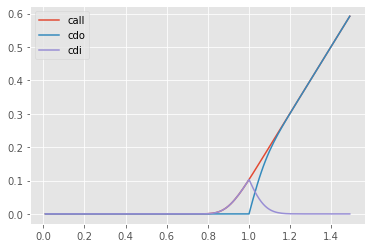

In [3]:
step=0.01
H=1
list_c = [PriceBarrierOptions(i,r, sigma, T, K, H,"c") for i in np.arange(0.01,1.5,step)]
list_cdi = [PriceBarrierOptions(i,r, sigma, T, K, H,"cdi") for i in np.arange(0.01,1.5,step)]
list_cdo = [PriceBarrierOptions(i,r, sigma, T, K, H,"cdo") for i in np.arange(0.01,1.5,step)]
plt.plot(np.arange(0.01,1.5,step),list_c,label="call")
plt.plot(np.arange(0.01,1.5,step),list_cdo,label="cdo")
plt.plot(np.arange(0.01,1.5,step),list_cdi,label="cdi")
plt.legend()

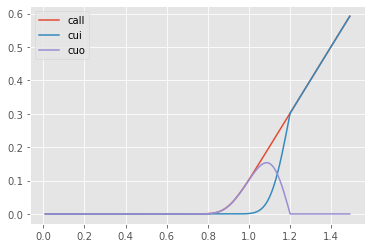

In [4]:
step=0.01
H=1.2
list_c = [PriceBarrierOptions(i,r, sigma, T, K, H,"c") for i in np.arange(0.01,1.5,step)]
list_cui = [PriceBarrierOptions(i,r, sigma, T, K, H,"cui") for i in np.arange(0.01,1.5,step)]
list_cuo = [PriceBarrierOptions(i,r, sigma, T, K, H,"cuo") for i in np.arange(0.01,1.5,step)]
plt.plot(np.arange(0.01,1.5,step),list_c,label="call")
plt.plot(np.arange(0.01,1.5,step),list_cui,label="cui")
plt.plot(np.arange(0.01,1.5,step),list_cuo,label="cuo")
plt.legend()

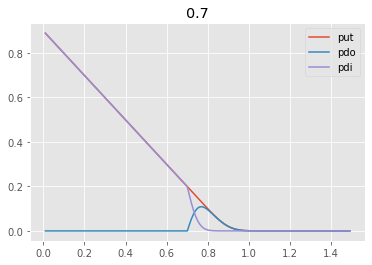

In [5]:
H=0.7
T=1/12
list_p = [PriceBarrierOptions(i,r, sigma, T, K, H,"p") for i in np.arange(0.01,1.5,step)]
list_pdi = [PriceBarrierOptions(i,r, sigma, T, K, H,"pdi") for i in np.arange(0.01,1.5,step)]
list_pdo = [PriceBarrierOptions(i,r, sigma, T, K, H,"pdo") for i in np.arange(0.01,1.5,step)]
plt.plot(np.arange(0.01,1.5,step),list_p,label="put")
plt.plot(np.arange(0.01,1.5,step),list_pdo,label="pdo")
plt.plot(np.arange(0.01,1.5,step),list_pdi,label="pdi")
plt.title(H)
plt.legend()

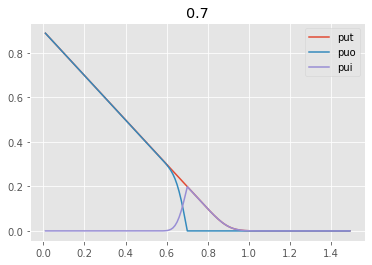

In [6]:
H=0.7
T=1/12
list_p = [PriceBarrierOptions(i,r, sigma, T, K, H,"p") for i in np.arange(0.01,1.5,step)]
list_pui = [PriceBarrierOptions(i,r, sigma, T, K, H,"pui") for i in np.arange(0.01,1.5,step)]
list_puo = [PriceBarrierOptions(i,r, sigma, T, K, H,"puo") for i in np.arange(0.01,1.5,step)]
plt.plot(np.arange(0.01,1.5,step),list_p,label="put")
plt.plot(np.arange(0.01,1.5,step),list_puo,label="puo")
plt.plot(np.arange(0.01,1.5,step),list_pui,label="pui")
plt.title(H)
plt.legend()

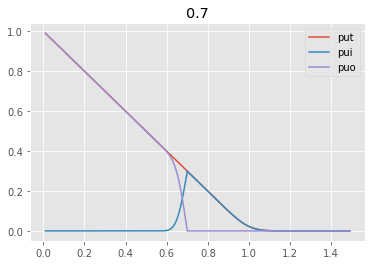

In [12]:
H=0.7
T=1/12
x_array = np.arange(0.01,1.5,step)
vect = np.vectorize(PriceBarrierOptions)
plt.plot(x_array,vect(x_array,r, sigma, T, K, H,"p"),label="put")
plt.plot(x_array,vect(x_array,r, sigma, T, K, H,"pui"),label="pui")
plt.plot(x_array,vect(x_array,r, sigma, T, K, H,"puo"),label="puo")
plt.title(H)
plt.legend()

## Deriving 

0.5 1 1 1.2


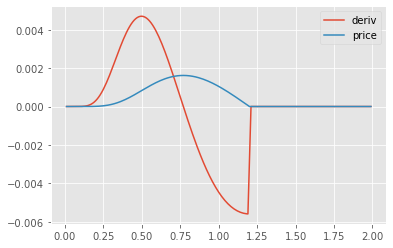

In [15]:
print(sigma, 1, K, H_UOC)
sigma,K, H_UOC, T = 0.5, 1, 1.2, 0.9


x = np.arange(0.01,2,0.01)
dx = x[1]-x[0]
#y = PriceBarrierOptions(x, 0, sigma, 1, K, H_UOC, "cuo")
vect = np.vectorize(PriceBarrierOptions,otypes=[float])
y = vect(x, 0, sigma, 1, K, H_UOC, "cuo")
dydx = np.gradient(y, dx)
plt.plot(x,dydx,label="deriv")
plt.plot(x,y,label="price")
plt.legend()


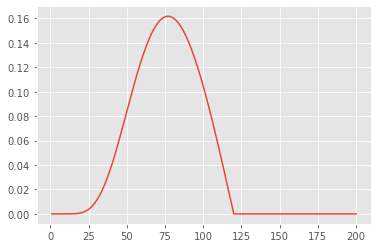

In [24]:
xxxx=np.linspace(1,200,200)
plt.plot(xxxx,vect(xxxx, 0, sigma, 1, 100, 120, "cuo"),label="deriv")

In [23]:
vect(xxxx, 0, sigma, 1, 100, 120, "cuo")

array([6.55705729e-21])

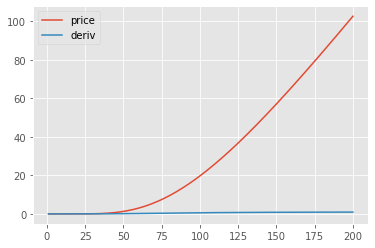

In [29]:
xxxx=np.linspace(1,200,200)
plt.plot(xxxx,vect(xxxx, 0, sigma, 1, 100, 120, "c"),label="price")

dx = xxxx[1]-xxxx[0]
dydx = np.gradient(vect(xxxx, 0, sigma, 1, 100, 120, "c"), dx)
plt.plot(xxxx,dydx,label="deriv")
plt.legend()

In [ ]:
dzazdad